1. 

(X_train=80%)
(X_test=20%)

A partir del archivo "iris.csv" que se corresponde con datos relacionados con tres tipos de plantas (el target es el tipo de planta):

- Mediante knn, predice qué planta se corresponde con los ejemplos: [[15.7,2.8,9.5,0.1]] y [[1.7,3.8,4.5,11.3]] para k=3 y k=7
- ¿Qué acierto tiene tu modelo para k=3, k=7? (score)
- Entre 1 y 20, ¿qué k tiene un mejor acierto en tu modelo? visualiza el score con el valor de k en una gráfica.
- Utiliza un conjunto de test con el 60% de los datos: ¿cambian los resultados anteriores? ¿por qué?
- Elimina la clase "Setosa" de tus datos. Repite el proceso anterior, ¿cambian los resultados?
- ¿Consideras Knn un buen algoritmo para estos datos? ¿por qué?

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [13]:
df = pd.read_csv('../data/iris.csv')

In [14]:
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [15]:
df.variety.value_counts()

Setosa        50
Versicolor    50
Virginica     50
Name: variety, dtype: int64

In [16]:
encoder = LabelEncoder()
encoder.fit(df['variety'].values)

LabelEncoder()

In [17]:
df.variety = encoder.transform(df['variety'])

In [18]:
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [19]:
seed = 42

In [42]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1].values, df['variety'].values, test_size=0.2, random_state=seed)

In [43]:
planta1 = np.array([15.7,2.8,9.5,0.1])
planta2 = np.array([1.7,3.8,4.5,11.3])

In [61]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X=X_train, y=y_train)
score = model.score(X_test, y_test)
print(f'La planta será de tipo {encoder.inverse_transform([model.predict(planta1.reshape(1, -1)).item()]).item()}')

La planta será de tipo Virginica


In [64]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X=X_train, y=y_train)
print(f'El score del modelo con 3 vecinos es de {model.score(X_test, y_test)}')
print(f'La planta será de tipo {encoder.inverse_transform([model.predict(planta1.reshape(1, -1)).item()]).item()}')

El score del modelo con 3 vecinos es de 0.85
La planta será de tipo Virginica


In [66]:
model = KNeighborsClassifier(n_neighbors=7)
model.fit(X=X_train, y=y_train)
print(f'El score del modelo con 7 vecinos es de {model.score(X_test, y_test)}')
print(f'La planta será de tipo {encoder.inverse_transform([model.predict(planta1.reshape(1, -1)).item()]).item()}')

El score del modelo con 7 vecinos es de 0.9
La planta será de tipo Virginica


1 vecinos ----> 1.0 score
2 vecinos ----> 1.0 score
3 vecinos ----> 1.0 score
4 vecinos ----> 1.0 score
5 vecinos ----> 1.0 score
6 vecinos ----> 1.0 score
7 vecinos ----> 0.97 score
8 vecinos ----> 1.0 score
9 vecinos ----> 1.0 score
10 vecinos ----> 1.0 score
11 vecinos ----> 1.0 score
12 vecinos ----> 1.0 score
13 vecinos ----> 1.0 score
14 vecinos ----> 1.0 score
15 vecinos ----> 1.0 score
16 vecinos ----> 1.0 score
17 vecinos ----> 1.0 score
18 vecinos ----> 1.0 score
19 vecinos ----> 1.0 score
20 vecinos ----> 1.0 score


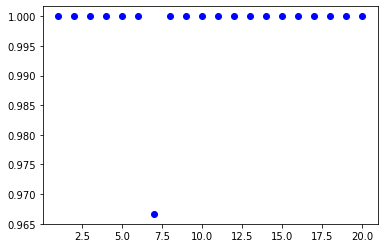

In [21]:
fig, ax = plt.subplots()
for k in range(1, 21):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X=X_train, y=y_train)
    score = model.score(X_test, y_test)
    print(f'{k} vecinos ----> {round(score, 2)} score')
    ax.plot(k, score , 'bo')

In [22]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1].values, df['variety'].values, test_size=0.6, random_state=seed)

1 vecinos ----> 0.98 score
2 vecinos ----> 0.94 score
3 vecinos ----> 0.96 score
4 vecinos ----> 0.94 score
5 vecinos ----> 0.94 score
6 vecinos ----> 0.96 score
7 vecinos ----> 0.97 score
8 vecinos ----> 0.96 score
9 vecinos ----> 0.94 score
10 vecinos ----> 0.96 score
11 vecinos ----> 0.97 score
12 vecinos ----> 0.97 score
13 vecinos ----> 0.98 score
14 vecinos ----> 0.96 score
15 vecinos ----> 0.96 score
16 vecinos ----> 0.96 score
17 vecinos ----> 0.94 score
18 vecinos ----> 0.96 score
19 vecinos ----> 0.97 score
20 vecinos ----> 0.94 score


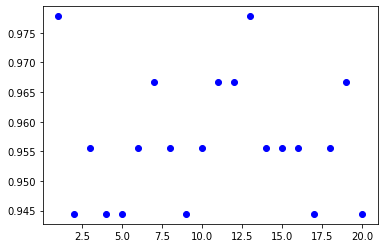

In [23]:
fig, ax = plt.subplots()
for k in range(1, 21):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X=X_train, y=y_train)
    score = model.score(X_test, y_test)
    print(f'{k} vecinos ----> {round(score, 2)} score')
    ax.plot(k, score , 'bo')

In [26]:
# Eliminamos la clase Setosa
df = df[~(df.variety == encoder.transform(['Setosa']).item())]

In [27]:
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [28]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1].values, df['variety'].values, test_size=0.6, random_state=seed)

1 vecinos ----> 0.97 score
2 vecinos ----> 0.93 score
3 vecinos ----> 0.93 score
4 vecinos ----> 0.93 score
5 vecinos ----> 0.97 score
6 vecinos ----> 0.97 score
7 vecinos ----> 0.95 score
8 vecinos ----> 0.95 score
9 vecinos ----> 0.93 score
10 vecinos ----> 0.93 score
11 vecinos ----> 0.88 score
12 vecinos ----> 0.93 score
13 vecinos ----> 0.93 score
14 vecinos ----> 0.95 score
15 vecinos ----> 0.88 score
16 vecinos ----> 0.9 score
17 vecinos ----> 0.88 score
18 vecinos ----> 0.88 score
19 vecinos ----> 0.82 score
20 vecinos ----> 0.85 score


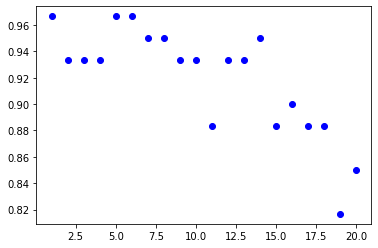

In [29]:
fig, ax = plt.subplots()
for k in range(1, 21):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X=X_train, y=y_train)
    score = model.score(X_test, y_test)
    print(f'{k} vecinos ----> {round(score, 2)} score')
    ax.plot(k, score , 'bo')